<a href="https://colab.research.google.com/github/mittshah2/Mask_detection/blob/master/mask_detection_with_haar_cascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/drive/My Drive/mask_detection/dataset_large.zip' -d '/content/drive/My Drive/mask_detection'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: /content/drive/My Drive/mask_detection/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: /content/drive/My Drive/mask_detection/Face M

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [0]:
datagen=ImageDataGenerator(rescale=1/255)

In [8]:
train=datagen.flow_from_directory('/content/drive/My Drive/mask_detection/Face Mask Dataset/Train',class_mode='binary')
test=datagen.flow_from_directory('/content/drive/My Drive/mask_detection/Face Mask Dataset/Test',class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [9]:
train.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [0]:
input_shape=(256,256,3)

In [0]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

model=Sequential()

model.add(Conv2D(64,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(256,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(512,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())


model.add(Dropout(0.4))


model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.summary()

In [0]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)

In [13]:
model.fit(train,epochs=20,validation_data=(test),shuffle=True,callbacks=[early,reduce_lr])

Epoch 1/20
313/313 [==============================] - 215s 688ms/step - loss: 0.3556 - accuracy: 0.9276 - val_loss: 0.0976 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 2/20
313/313 [==============================] - 213s 682ms/step - loss: 0.0790 - accuracy: 0.9718 - val_loss: 0.0601 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 3/20
313/313 [==============================] - 214s 683ms/step - loss: 0.0476 - accuracy: 0.9819 - val_loss: 0.0406 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 4/20
313/313 [==============================] - 212s 679ms/step - loss: 0.0549 - accuracy: 0.9809 - val_loss: 0.0594 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 5/20
313/313 [==============================] - 213s 680ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0418 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 6/20
313/313 [==============================] - 212s 678ms/step - loss: 0.0268 - accuracy: 0.9905 - val_loss: 0.0447 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 7/20
313/313 [==========================

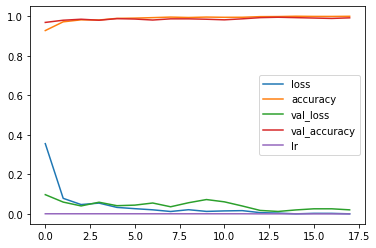

In [15]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.plot()

In [0]:
import cv2
face_cascade=cv2.CascadeClassifier('/content/drive/My Drive/mask_detection/face_cascade.xml')

In [0]:
import matplotlib.pyplot as plt
from skimage.transform import resize

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


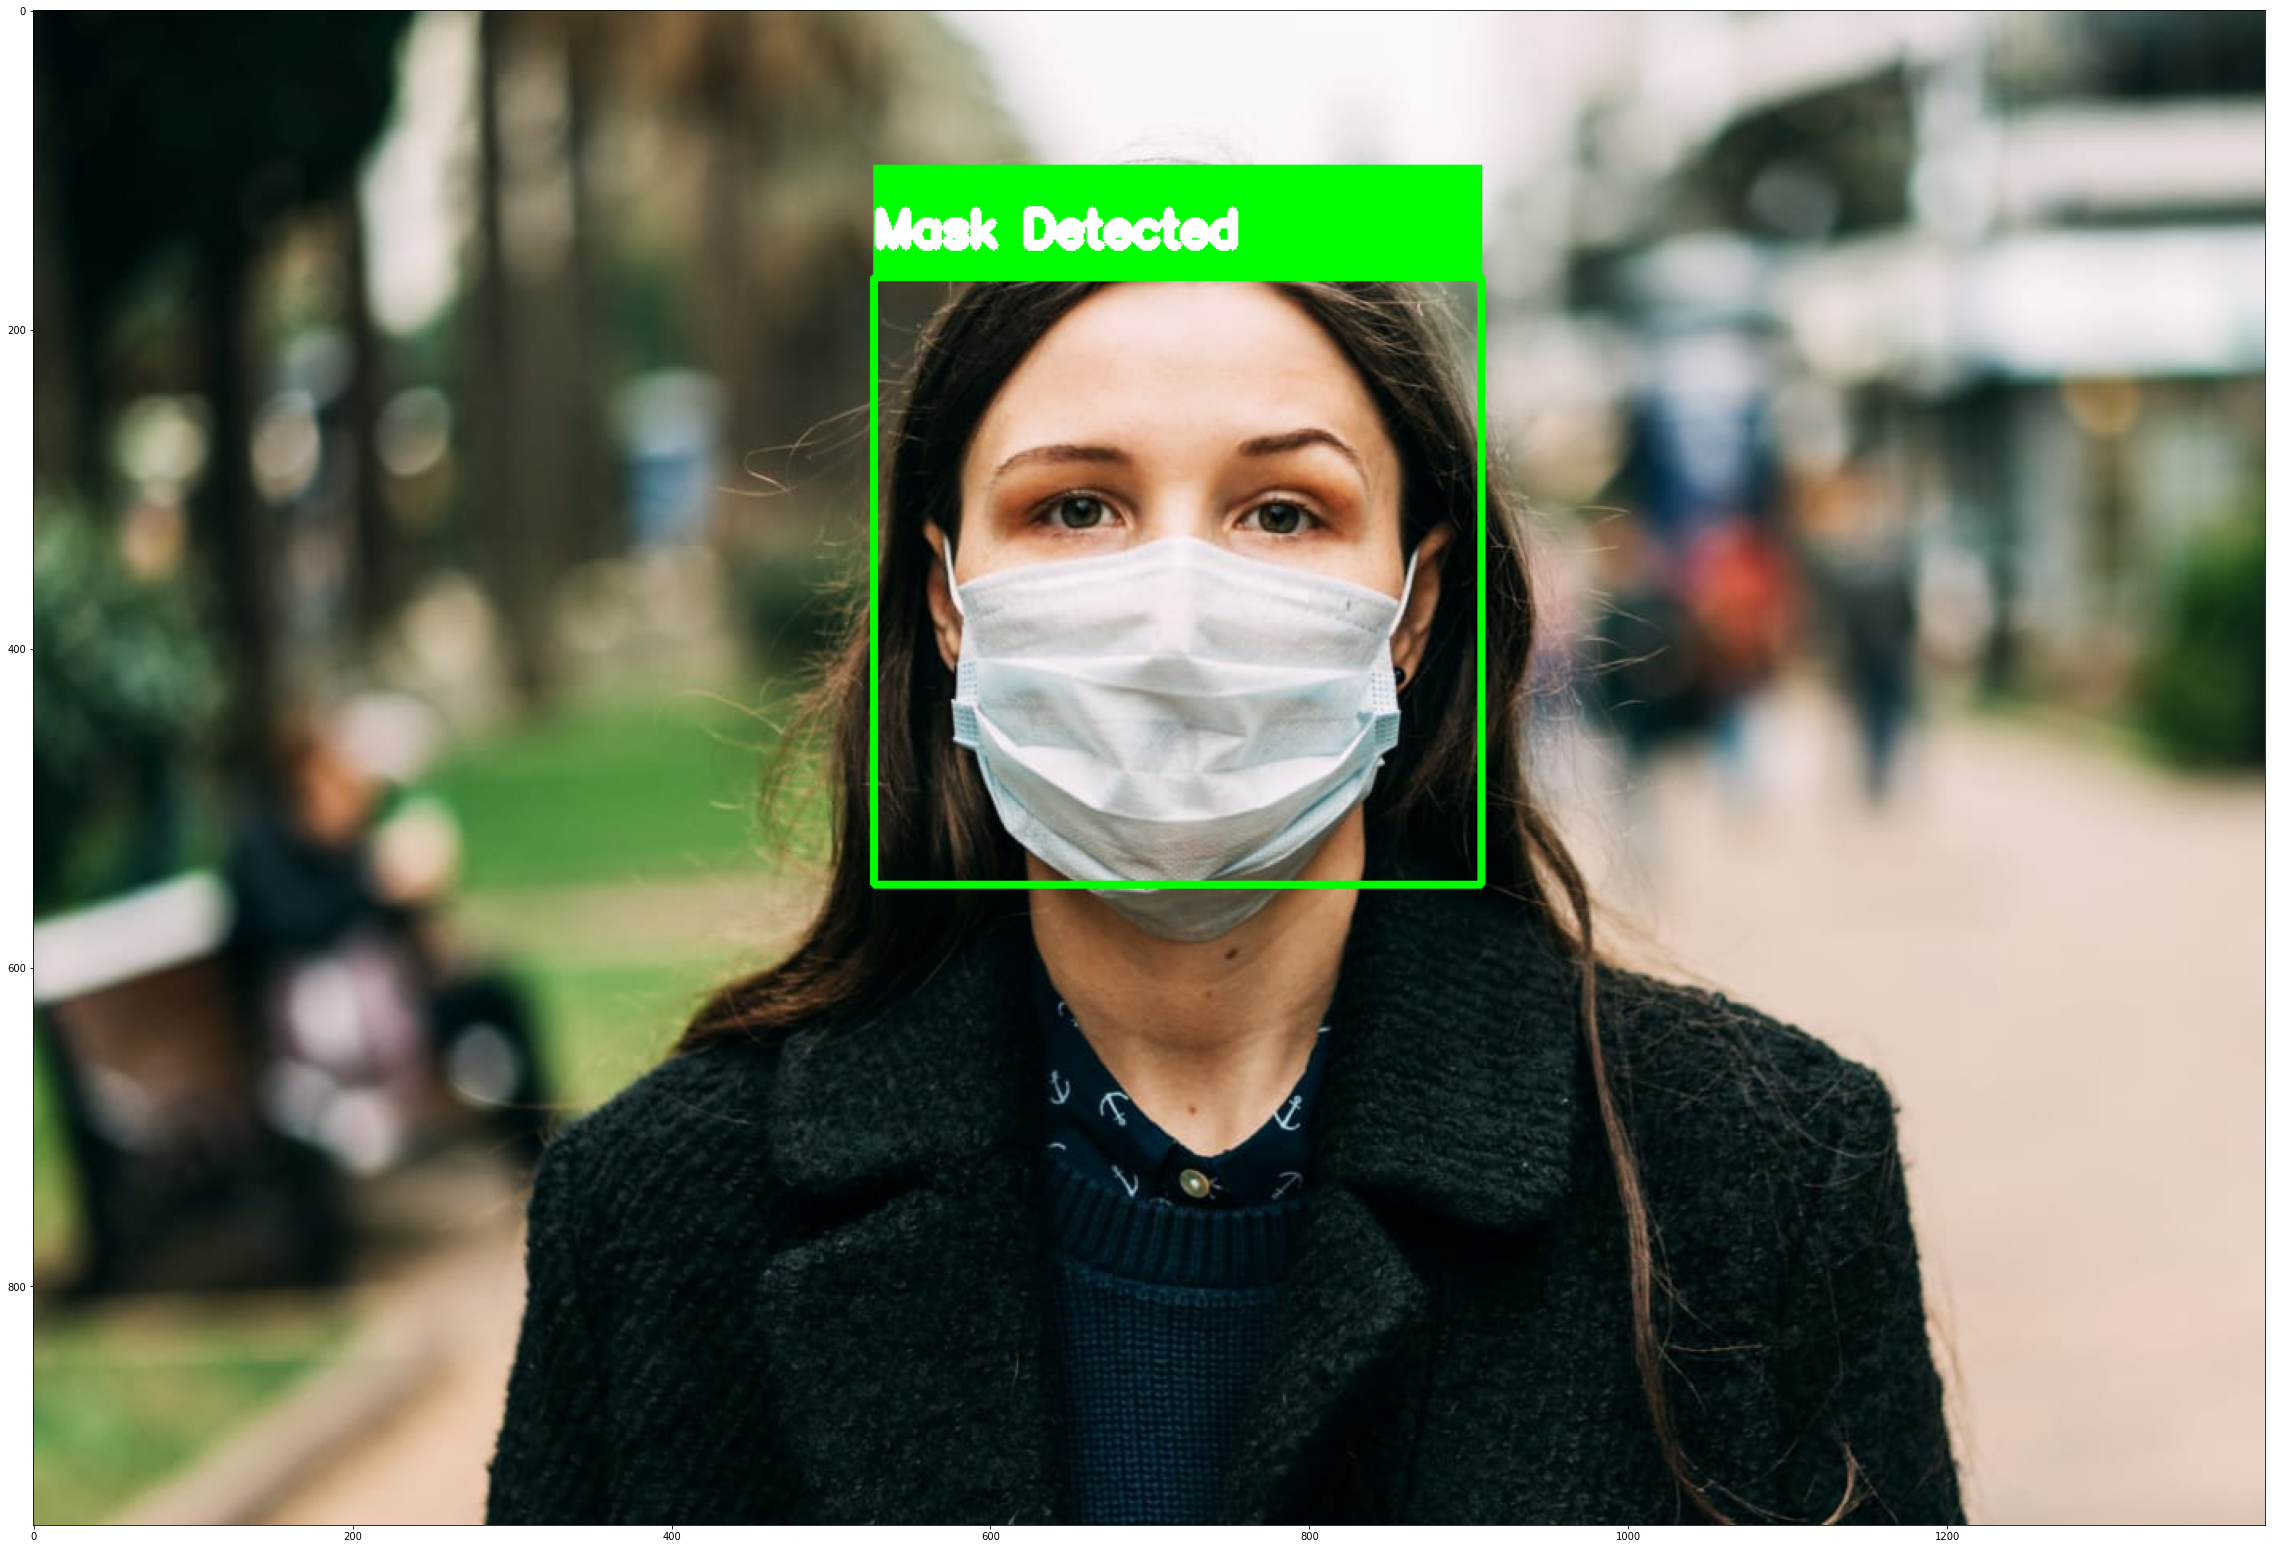

In [33]:
plt.figure(figsize=(40,30))

img_path='/content/1.jpg'
img=plt.imread(img_path)

gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
faces=face_cascade.detectMultiScale(gray,1.3,5)


for (x,y,w,h) in faces:
    pred_img=img[y:y+h,x:x+h]
    pred_img=resize(pred_img,(256,256))
    pred=model.predict_classes(np.expand_dims(pred_img,axis=0))[0][0]

    if pred==0:
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
      cv2.rectangle(img,(x,y),(x+w,y-70),(0,255,0),-1)
      cv2.putText(img,'Mask Detected',(x,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 255, 255),5)
    else:
      cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
      cv2.rectangle(img,(x-55,y),(x+w+20,y-70),(255,0,0),-1)
      cv2.putText(img,'Mask Not Detected',(x-50,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255, 255, 255),5)

plt.imshow(img)

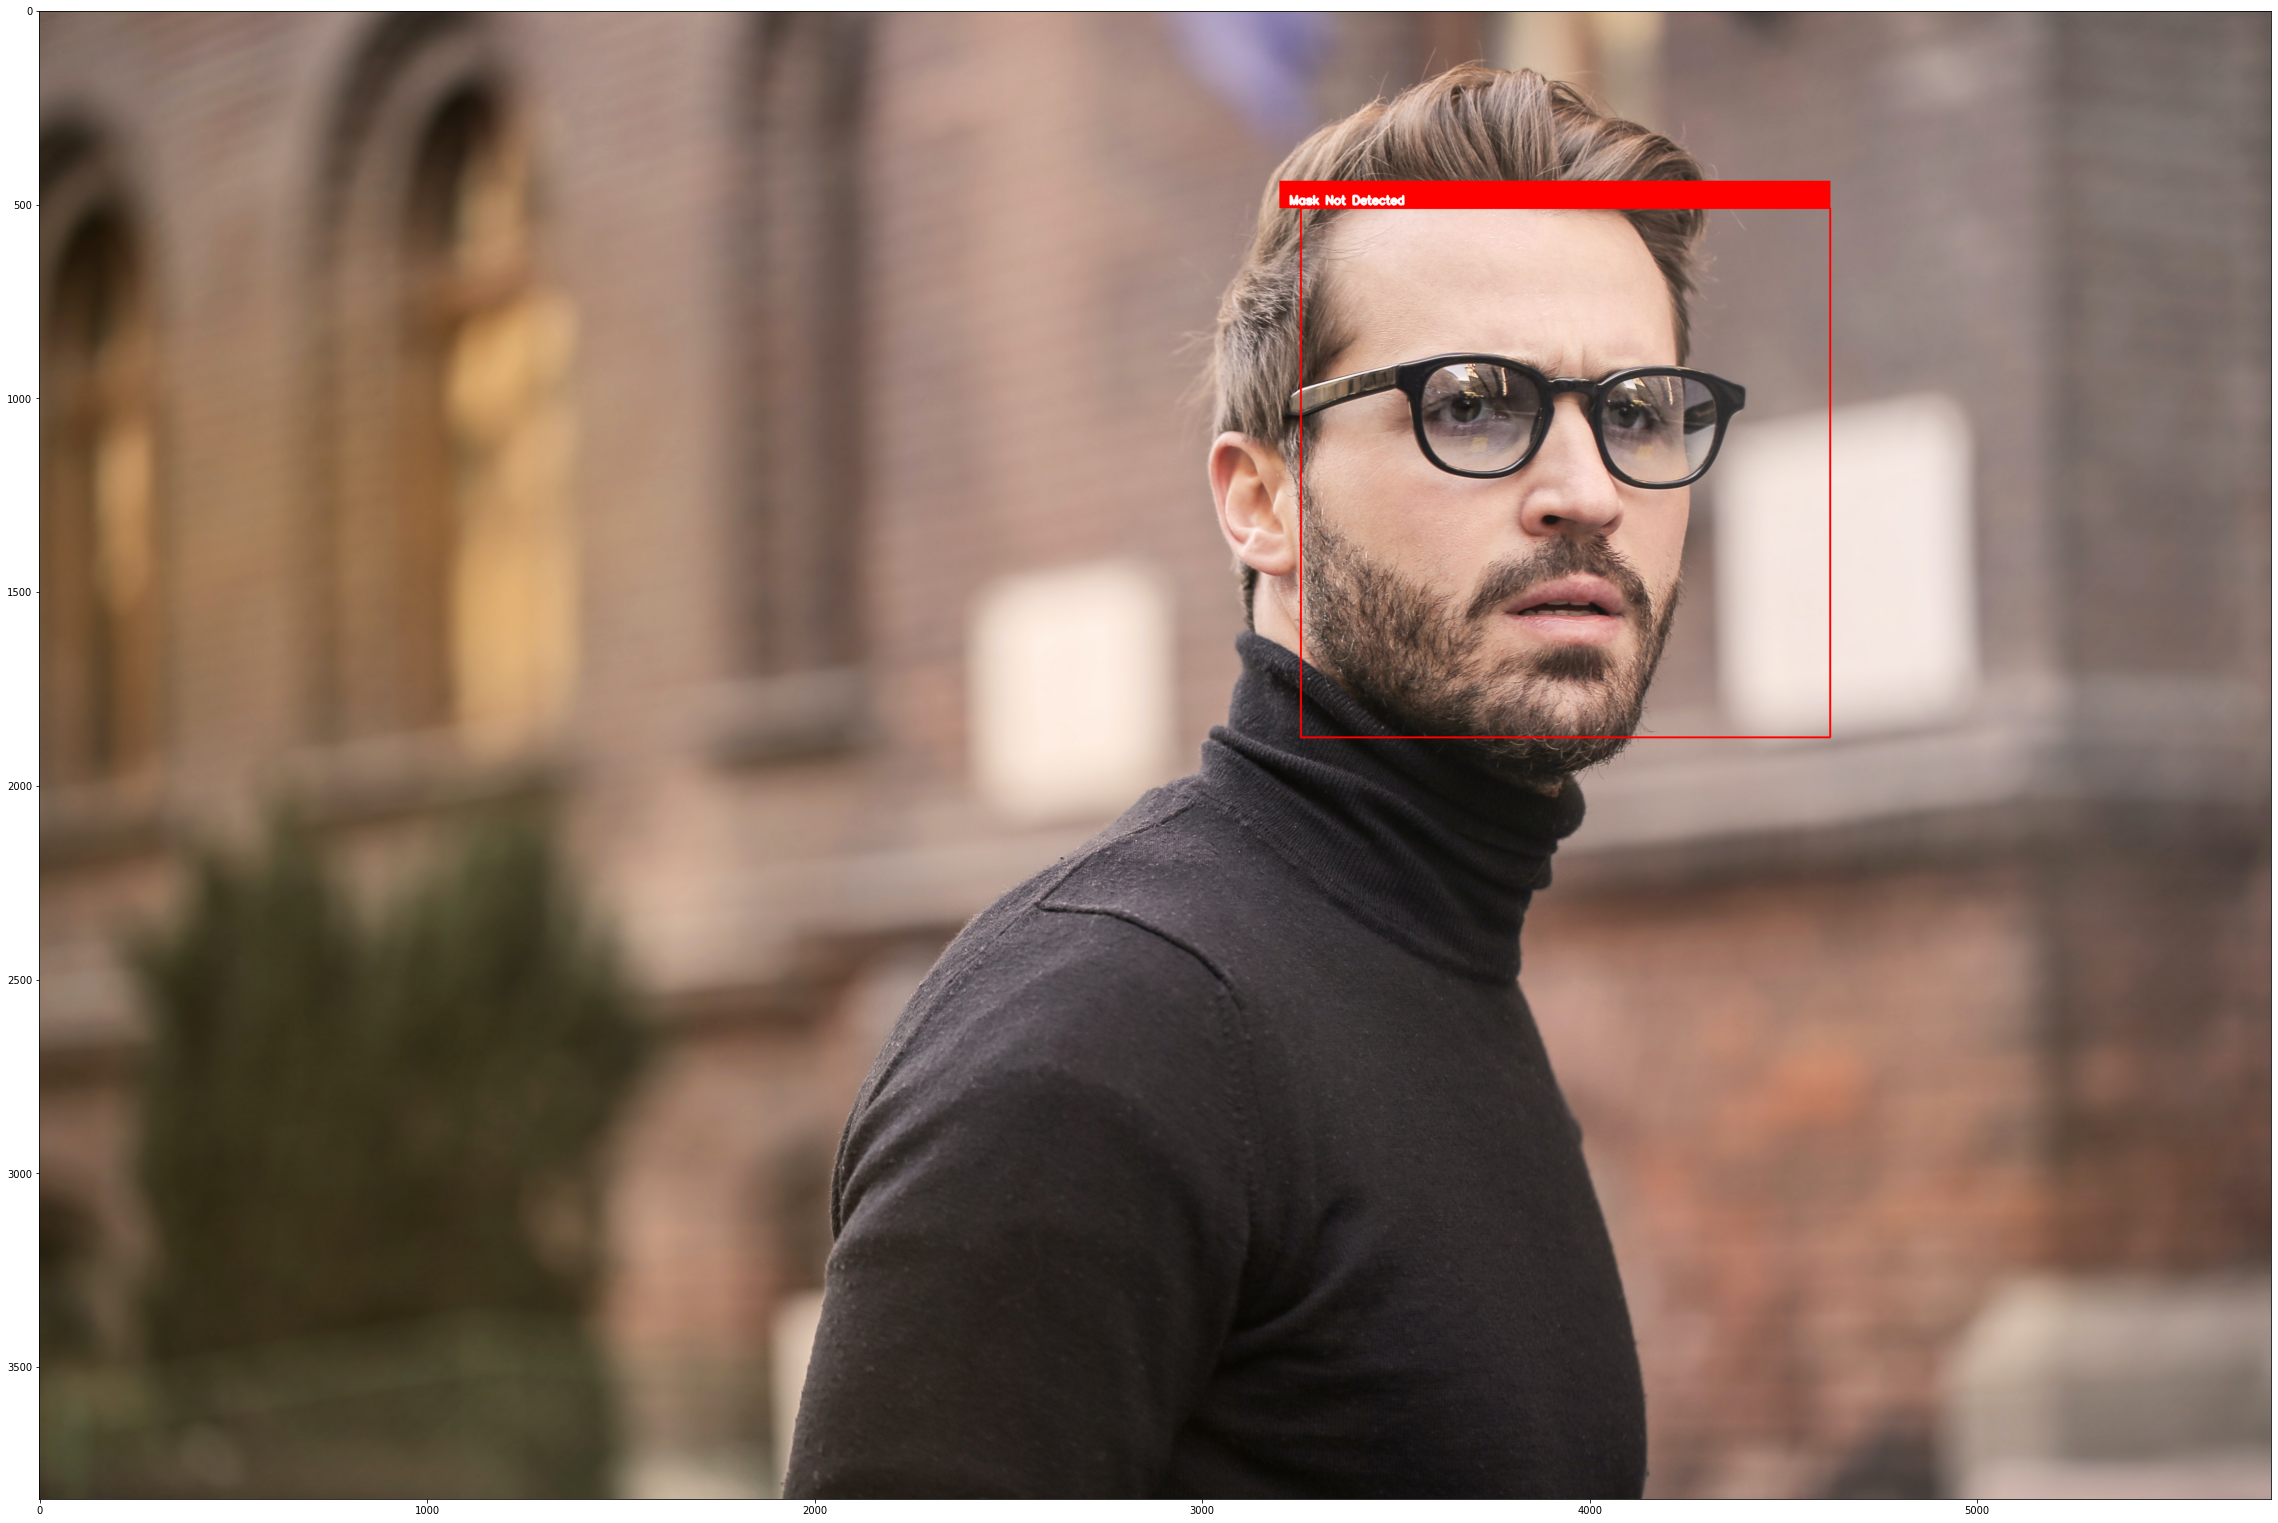

In [35]:
plt.figure(figsize=(40,30))
img_path='/content/2.jpg'
from skimage.transform import resize
faces=face_cascade.detectMultiScale(img,1.3,5)

img=plt.imread(img_path)
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

for (x,y,w,h) in faces:
    pred_img=img[y:y+h,x:x+h]
    pred_img=resize(pred_img,(256,256))
    pred=model.predict_classes(np.expand_dims(pred_img,axis=0))[0][0]

    if pred==0:
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
      cv2.rectangle(img,(x,y),(x+w,y-70),(0,255,0),-1)
      cv2.putText(img,'Mask Detected',(x,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 255, 255),5)
    else:
      cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
      cv2.rectangle(img,(x-55,y),(x+w,y-70),(255,0,0),-1)
      cv2.putText(img,'Mask Not Detected',(x-50+20,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 255, 255),5)

plt.imshow(img)